In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
db_filename='dinofunworld.db'
conn=sqlite3.connect(db_filename)
c=conn.cursor()

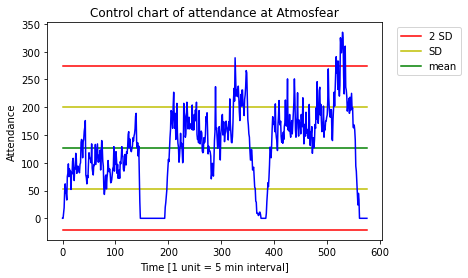

In [2]:
# 1: The park's administrators are worried about the attendance at the ride 'Atmosfear' in the data window. 
#To assuage their fears, they have asked you to create a control chart of the total attendance at this ride. 
#Using the data provided, create a control chart displaying the attendance, the mean, and the standard deviation bands 
#at one and two standard deviations.
c.execute("SELECT attractionID FROM attraction where Name='Atmosfear'")
attr_id=c.fetchone()[0]
c.execute("SELECT visitorID,sequence FROM sequences WHERE sequence LIKE '%-" + str(attr_id) + "-%' ")
seq=c.fetchall()
#print(len(seq))
#print(len(seq[0][1].split('-')))
value=[]
for i in range(len(seq)-1):
    for j in range(int(len(seq[0][1].split('-')))):
        if seq[i][1].split('-')[j]=='8':
            value.append(j)
#print(value)
my_dict={}
for item in value:
    if item in my_dict:
        my_dict[item]=my_dict[item]+1
    else:
        my_dict[item]=1
for item in range(int(len(seq[0][1].split('-')))):
    if item in my_dict:
        continue
    else:
        my_dict[item]=0
sort={}
sort=sorted(my_dict.items())
#print (sort)
res = [list(ele) for ele in sort] 
#print(res) 
attendance = [i[1] for i in res] 
mean = np.nanmean(attendance)
std = np.nanstd(attendance)
x_axis_list = range(0, len(attendance), 1)
plt.plot(x_axis_list, [mean+2*std]*len(attendance), 'r-',label= '2 SD')
plt.plot(x_axis_list, [mean-2*std]*len(attendance), 'r-')
plt.plot(x_axis_list, [mean+std]*len(attendance), 'y-',label= 'SD')
plt.plot(x_axis_list, [mean-std]*len(attendance), 'y-')
plt.plot(x_axis_list, [mean]*len(attendance), 'g-',label= 'mean')
plt.plot(x_axis_list, attendance, 'b-')
plt.legend(loc='upper right',bbox_to_anchor=(1.25,1))
plt.ylabel('Attendance')
plt.xlabel('Time [1 unit = 5 min interval]')
plt.title('Control chart of attendance at Atmosfear')
plt.show()

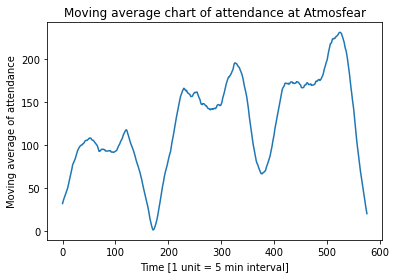

In [3]:
#2: Some of the park's administrators are having trouble interpreting the control chart graph of 'Atmosfear' attendance, so they
#ask you to also provide a moving average chart of the attendance in addition to the control chart created in the 
#previous question. In this case, they request that you use 50 samples for the size of the moving average window.
window_size = 50
plt.plot(x_axis_list, np.convolve(attendance, np.ones(window_size,)/window_size, 'same'), )
plt.ylabel('Moving average of attendance')
plt.xlabel('Time [1 unit = 5 min interval]')
plt.title('Moving average chart of attendance at Atmosfear')
plt.show()

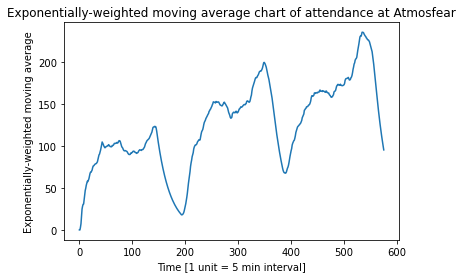

In [4]:
#3: In order to have options concerning the graphs presented, the park's administrators also ask you to provide a 
#50-sample moving average window with the average computed with exponential weighting 
#(i.e. an exponentially-weight moving average) over the same 'Atmosfear' attendance data.
span = 50
df = pd.DataFrame(data=attendance)
df_exp = df.ewm(span=span).mean()
plt.plot(df_exp)
plt.ylabel('Exponentially-weighted moving average')
plt.xlabel('Time [1 unit = 5 min interval]')
plt.title('Exponentially-weighted moving average chart of attendance at Atmosfear')
plt.show()